In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight/Jan_2019_ontime.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
#LOAD AND PREVIEW DATA
filename = '/kaggle/input/flight/Jan_2019_ontime.csv'

df = pd.read_csv(filename)
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,9E,20363,9E,N348PQ,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,9E,20363,9E,N8896A,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,9E,20363,9E,N8886A,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,1,2,9E,20363,9E,N8974C,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


In [4]:
# menampilkan variabel categorical

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 6 categorical variables

The categorical variables are :

 ['OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST', 'DEP_TIME_BLK']


In [5]:
# menampilkan variabel numerical

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 13 numerical variables

The numerical variables are : ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DEP_TIME', 'DEP_DEL15', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'DISTANCE']


In [6]:
# mengilangkan kolom yang tidak digunakan
dataframe = df.drop(columns=['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'OP_UNIQUE_CARRIER'])

dataframe.head(5)

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,9E,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,9E,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,9E,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,9E,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,9E,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


In [7]:
# mendefinisikan vector fitur dan variabel target

X = dataframe.drop(['CANCELLED'], axis=1)
y = dataframe['CANCELLED']

In [8]:
# bagi data menjadi data training dan data tes

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
X_train.shape, X_test.shape

((467188, 13), (116797, 13))

In [10]:
# menampilkan variabel categorical dalam X_train
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O'] 

categorical

['OP_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK']

In [11]:
X_train[categorical].isnull().mean() #cek nilai yang hilang pada variabel categorical di X_train

OP_CARRIER      0.0
ORIGIN          0.0
DEST            0.0
DEP_TIME_BLK    0.0
dtype: float64

In [12]:
X_test[categorical].isnull().sum() #cek nilai yang hilang pada variabel categorical di X_test

OP_CARRIER      0
ORIGIN          0
DEST            0
DEP_TIME_BLK    0
dtype: int64

In [13]:
# menampilkan variabel numerical di X_train

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['OP_CARRIER_FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'DEST_AIRPORT_ID',
 'DEP_TIME',
 'DEP_DEL15',
 'ARR_TIME',
 'ARR_DEL15',
 'DIVERTED',
 'DISTANCE']

In [14]:
X_train[numerical].isnull().mean() #cek nilai yang hilang pada variabel numerik

OP_CARRIER_FL_NUM    0.000000
ORIGIN_AIRPORT_ID    0.000000
DEST_AIRPORT_ID      0.000000
DEP_TIME             0.028047
DEP_DEL15            0.028051
ARR_TIME             0.029205
ARR_DEL15            0.030838
DIVERTED             0.000000
DISTANCE             0.000000
dtype: float64

In [15]:
# menampilkan variabel numerical yang terdapat missing data

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

DEP_TIME 0.028046525167598483
DEP_DEL15 0.028050806099471734
ARR_TIME 0.029204517239312652
ARR_DEL15 0.030837692748957594


In [16]:
# Mengisi variabel numerik yang hilang dengan nilai yang paling sering muncul

for df2 in [X_train, X_test]:
    df2['DEP_TIME'].fillna(X_train['DEP_TIME'].mode()[0], inplace=True)
    df2['DEP_DEL15'].fillna(X_train['DEP_DEL15'].mode()[0], inplace=True)
    df2['ARR_TIME'].fillna(X_train['ARR_TIME'].mode()[0], inplace=True)
    df2['ARR_DEL15'].fillna(X_train['ARR_DEL15'].mode()[0], inplace=True)

In [17]:
X_train[numerical].isnull().sum() # cek nilai yang hilang pada variabel numerical di training set

OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
DEST_AIRPORT_ID      0
DEP_TIME             0
DEP_DEL15            0
ARR_TIME             0
ARR_DEL15            0
DIVERTED             0
DISTANCE             0
dtype: int64

In [18]:
X_train.isnull().sum() # cek missing values di X_train

OP_CARRIER           0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
DEST_AIRPORT_ID      0
DEST                 0
DEP_TIME             0
DEP_DEL15            0
DEP_TIME_BLK         0
ARR_TIME             0
ARR_DEL15            0
DIVERTED             0
DISTANCE             0
dtype: int64

In [19]:
X_test.isnull().sum() # cek missing values di X_test

OP_CARRIER           0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
DEST_AIRPORT_ID      0
DEST                 0
DEP_TIME             0
DEP_DEL15            0
DEP_TIME_BLK         0
ARR_TIME             0
ARR_DEL15            0
DIVERTED             0
DISTANCE             0
dtype: int64

In [20]:
X_train[categorical].head()

,OP_CARRIER,ORIGIN,DEST,DEP_TIME_BLK
68992,AA,ORD,PHL,0700-0759
256311,OO,ONT,SFO,1900-1959
483968,MQ,JFK,CLE,1500-1559
67415,B6,BUF,BOS,2100-2159
93603,YV,PHX,FAT,1700-1759


In [21]:
import category_encoders as ce

In [22]:
# encode variabel categorical menggunakan one-hot encoding untuk merepresentasikan data bertipe kategori sebagai vektor biner yang bernilai integer, 0 dan 1

encoder = ce.OneHotEncoder(cols=['OP_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [23]:
X_train.head(4)

,OP_CARRIER_1,OP_CARRIER_2,OP_CARRIER_3,OP_CARRIER_4,OP_CARRIER_5,OP_CARRIER_6,OP_CARRIER_7,OP_CARRIER_8,OP_CARRIER_9,OP_CARRIER_10,...,DEP_TIME_BLK_14,DEP_TIME_BLK_15,DEP_TIME_BLK_16,DEP_TIME_BLK_17,DEP_TIME_BLK_18,DEP_TIME_BLK_19,ARR_TIME,ARR_DEL15,DIVERTED,DISTANCE
68992,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,941.0,0.0,0,678
256311,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2102.0,0.0,0,363
483968,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1729.0,0.0,0,425
67415,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2212.0,0.0,0,395


In [24]:
X_train.shape

(467188, 737)

In [25]:
X_test.head()

,OP_CARRIER_1,OP_CARRIER_2,OP_CARRIER_3,OP_CARRIER_4,OP_CARRIER_5,OP_CARRIER_6,OP_CARRIER_7,OP_CARRIER_8,OP_CARRIER_9,OP_CARRIER_10,...,DEP_TIME_BLK_14,DEP_TIME_BLK_15,DEP_TIME_BLK_16,DEP_TIME_BLK_17,DEP_TIME_BLK_18,DEP_TIME_BLK_19,ARR_TIME,ARR_DEL15,DIVERTED,DISTANCE
183878,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1406.0,0.0,0,226
446957,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1840.0,0.0,0,873
356407,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,2015.0,0.0,0,2565
52391,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,2135.0,0.0,0,628
380221,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1610.0,0.0,0,285


In [26]:
cols = X_train.columns

In [27]:
# Feature scalling
# memetakan semua variabel fitur ke skala yang sama

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [29]:
X_train.head(5)

,OP_CARRIER_1,OP_CARRIER_2,OP_CARRIER_3,OP_CARRIER_4,OP_CARRIER_5,OP_CARRIER_6,OP_CARRIER_7,OP_CARRIER_8,OP_CARRIER_9,OP_CARRIER_10,...,DEP_TIME_BLK_14,DEP_TIME_BLK_15,DEP_TIME_BLK_16,DEP_TIME_BLK_17,DEP_TIME_BLK_18,DEP_TIME_BLK_19,ARR_TIME,ARR_DEL15,DIVERTED,DISTANCE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.709988,0.0,0.0,0.056380
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.687124,0.0,0.0,-0.410979
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.238267,0.0,0.0,-0.318991
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.819495,0.0,0.0,-0.363501
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.385078,1.0,0.0,-0.218101


In [30]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)


GaussianNB()

In [31]:
# Memprediksi hasil
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [32]:
# Cek nilai akurasi model

from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9985


In [34]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9986


In [36]:
# cek apakah underfitting atau overfitting
# menampilkan nilai dari training set dan test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9986
Test set score: 0.9985


Kedua nilai ini cukup sebanding. Jadi, tidak ada tanda-tanda overfitting

In [37]:
y_test.value_counts() # cek class distribution dalam tes set

0    113462
1      3335
Name: CANCELLED, dtype: int64

In [38]:
# cek null accuracy

null_accuracy = (113462/(113462+3335))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9714


In [40]:
# Membuat Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[113374     88]
 [    92   3243]]

True Positives(TP) =  113374

True Negatives(TN) =  3243

False Positives(FP) =  88

False Negatives(FN) =  92


<AxesSubplot:>

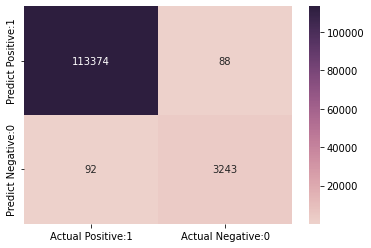

In [41]:
# Memvisualisasikan confusion matrix menggunakan seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))

In [42]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113462
           1       0.97      0.97      0.97      3335

    accuracy                           1.00    116797
   macro avg       0.99      0.99      0.99    116797
weighted avg       1.00      1.00      1.00    116797



In [43]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [44]:
# akurasi klasifikasi
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9985


In [45]:
# classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0015


In [46]:
# precision
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9992


In [47]:
# recall
recall = TP / float(TP + FN)
print('Recall : {0:0.4f}'.format(recall))

Recall : 0.9992
